# Campione casuale di imprese

In [1]:
print('hello')

hello


In [2]:
import pandas as pd

df = pd.read_csv('Campione_C.csv')
print(f"The dataset contains {len(df)} companies.")
print("Here is a sample:")

df.head(10)


The dataset contains 2750 companies.
Here is a sample:


C:\Users\longato\AppData\Local\Temp\ipykernel_24976\296478492.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,CF,Denominazione,ATECO_MACRO_lett,Filiera,ateco,RicaviVenditeClasse,DimensioneAziendale,Provincia
0,7470933,EMMEGI ZINCATURA S.R.L.,C,Altre filiere industriali,25.61,4. Alto,2. Piccola impresa,PN
1,18160309,DOTT.MARIANO PRAVISANI & C. S.R.L.,C,Meccatronica e robotica,28.29.2,4. Alto,2. Piccola impresa,UD
2,25330937,NIDALVEAR S.R.L.,C,Altre filiere industriali,17.22,2. Medio-basso,1. Micro impresa,PN
3,27730316,POSTIR S.R.L.,C,Altre filiere industriali,25.11,4. Alto,2. Piccola impresa,GO
4,39490313,MAZZONI MARIO EREDI S.R.L.,C,Altre filiere industriali,20.41.2,3. Medio-alto,1. Micro impresa,GO
5,39970314,FORNACI GIULIANE S.R.L.,C,Costruzioni e infrastrutture,23.61,1. Basso,1. Micro impresa,GO
6,40990319,GORIZIANE GROUP S.P.A.,C,Altre filiere industriali,25.11,4. Alto,3. Media impresa,GO
7,44850329,MODIANO INDUSTRIE CARTE DA GIOCO E AFFINI SO...,C,Altre filiere industriali,17.23,4. Alto,3. Media impresa,TS
8,47510326,EUROSPITAL S.P.A.,C,Salute,21.20.09,4. Alto,3. Media impresa,TS
9,48310320,RUPINI SOC. A R.L.,C,Altre filiere industriali,25.62,1. Basso,1. Micro impresa,TS


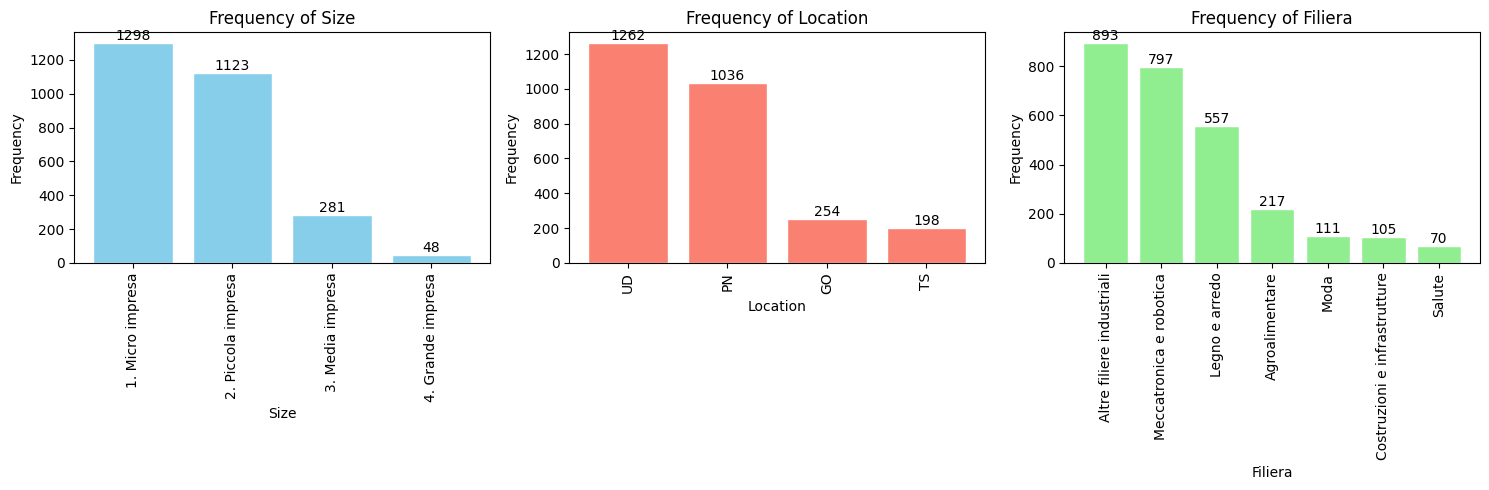

In [3]:
import matplotlib.pyplot as plt

def plot_column_charts(df):
    # Calculate frequency of each category
    size_counts = df['DimensioneAziendale'].value_counts()
    location_counts = df['Provincia'].value_counts()
    filiera_counts = df['Filiera'].value_counts()

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot column chart for size
    axes[0].bar(size_counts.index, size_counts.values, color='skyblue', edgecolor='white')
    axes[0].set_title('Frequency of Size')
    axes[0].set_xlabel('Size')
    axes[0].set_ylabel('Frequency')
    axes[0].tick_params(axis='x', rotation=90)
    for i, count in enumerate(size_counts.values):
        axes[0].text(i, count, str(count), ha='center', va='bottom')

    # Plot column chart for location
    axes[1].bar(location_counts.index, location_counts.values, color='salmon', edgecolor='white')
    axes[1].set_title('Frequency of Location')
    axes[1].set_xlabel('Location')
    axes[1].set_ylabel('Frequency')
    axes[1].tick_params(axis='x', rotation=90)
    for i, count in enumerate(location_counts.values):
        axes[1].text(i, count, str(count), ha='center', va='bottom')

    # Plot column chart for filiera
    axes[2].bar(filiera_counts.index, filiera_counts.values, color='lightgreen', edgecolor='white')
    axes[2].set_title('Frequency of Filiera')
    axes[2].set_xlabel('Filiera')
    axes[2].set_ylabel('Frequency')
    axes[2].tick_params(axis='x', rotation=90)
    for i, count in enumerate(filiera_counts.values):
        axes[2].text(i, count, str(count), ha='center', va='bottom')

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

# Call the function with your DataFrame
plot_column_charts(df)




Esempio di campionamento che dipende dall'ordine delle imprese in df

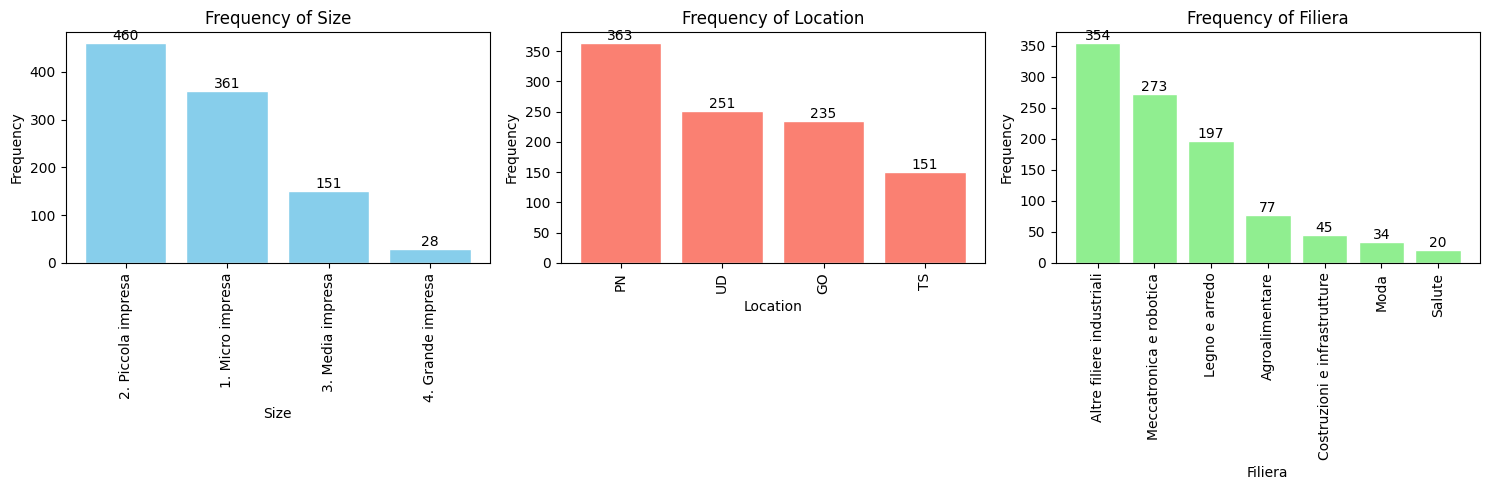

In [4]:
sample_size = 1000
sample1 = df.head(sample_size)
plot_column_charts(sample1)

# esempio di campionamento casuale (senza considerare i settori)

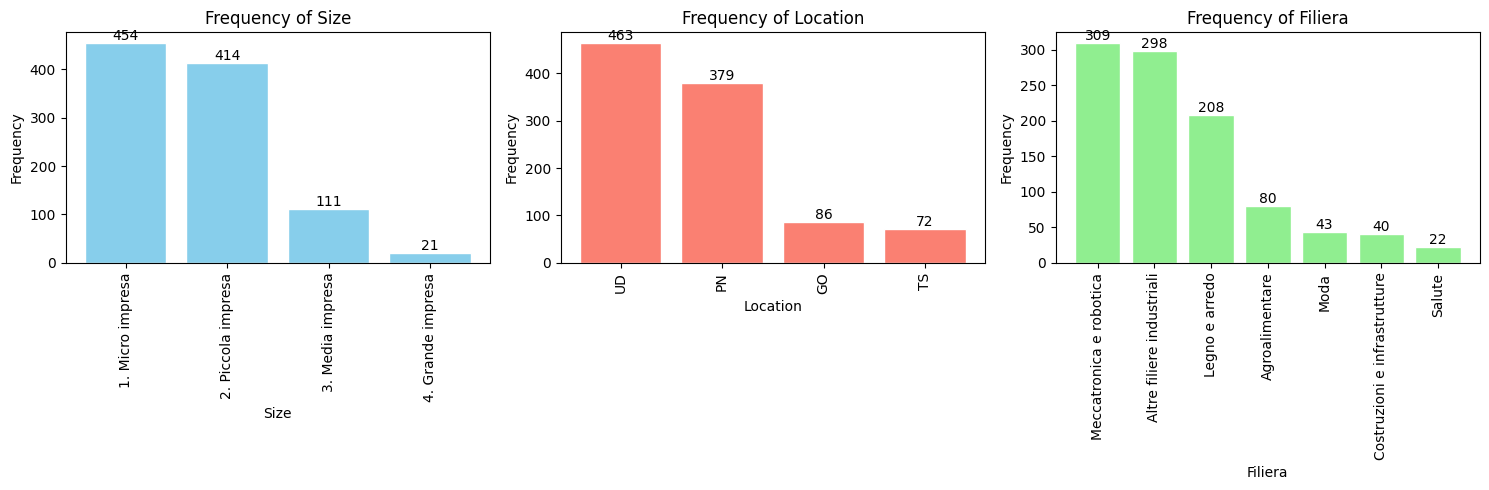

In [5]:
sample_size = 1000
sample1 = df.sample(sample_size)
plot_column_charts(sample1)

# esempio di campionamento considerando esplicitamente i settori

In [6]:
sample_size = 1000
dataset_size = len(df)
sample_percentage = sample_size / dataset_size
sample_percentage

0.36363636363636365

In [7]:

# Define the function to sample unequal percentages of companies within each group
def sample_percent(group, p):
    return group.sample(frac=p)


C:\Users\longato\AppData\Local\Temp\ipykernel_24976\1868552739.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample2 = df.groupby(['DimensioneAziendale', 'Provincia', 'Filiera'], group_keys=False).apply(sample_percent, p=sample_percentage)


Il campione estratto ha 998 imprese


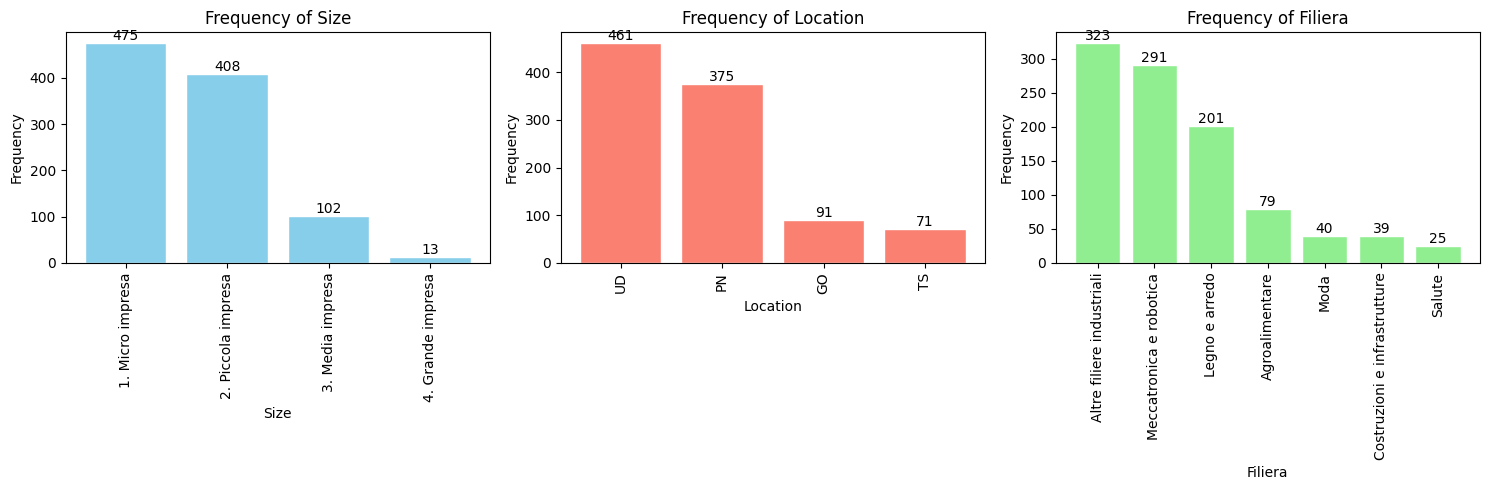

In [8]:
# Group the dataframe by filiera, size, and location, and apply the sampling function
sample2 = df.groupby(['DimensioneAziendale', 'Provincia', 'Filiera'], group_keys=False).apply(sample_percent, p=sample_percentage)

sample2.reset_index(drop=True, inplace=True)
print(f'Il campione estratto ha {len(sample2)} imprese')
plot_column_charts(sample2)


In [9]:
sample2.to_csv('campione_mille.csv')

In [10]:
conteggio = sample2.groupby(['DimensioneAziendale', 'Provincia', 'Filiera']).size()

conteggio.to_csv('conteggio.csv')

In [11]:
piccole = (conteggio < 5).sum()
tutte = conteggio.count()
tutte, piccole/tutte



(79, 0.46835443037974683)

<Axes: ylabel='Frequency'>

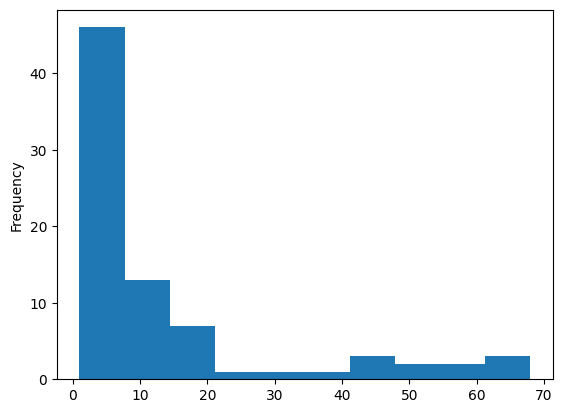

In [12]:
conteggio.plot(kind='hist')


<Axes: xlabel='DimensioneAziendale,Provincia,Filiera'>

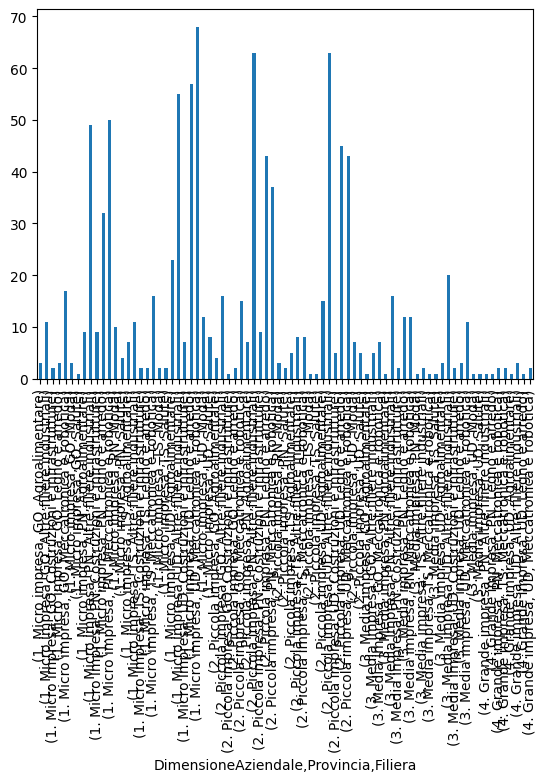

In [13]:
conteggio.plot(kind='bar')